Гномы добывают золото, периодически сообщая о своей щедрости. На этой операции по добыче полезных ископаемых использовались инструменты двух поколений, некоторые гномы были оснащены инструментами 1-го поколения, другие - 2-го поколения. После внедрения инструментов нового поколения генеральный директор Gnome Inc заметил, что производительность не соответствует его ожиданиям. Вы, как аналитик Gnome Inc, должны подтвердить или опровергнуть опасения генерального директора, подкрепляя свои выводы холодными достоверными данными.

Описание данных

1) dwarf_id -  индекс гнома 

2) hired_date - дата, когда гнома взяли на работу 

3) reported_date - дата за которую было собрано золото

4) gold_mined - к-во золото, собранное за reported date

5) hammer_date - (поколение инструментов)

In [117]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import numpy as np
import pandas as pd
from scipy.stats import norm, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

from tqdm.auto import tqdm

plt.style.use('ggplot')

In [13]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRXjhK8_pnLOGkGdFWvPLVz0QUtvbmvx8kCitzv-rkBYHNMgwZrs5YMzo8J13fPdqX0wnNja92YALAM/pub?gid=1076005889&single=true&output=csv')

In [14]:
df

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date
0,1,2014-01-01,2014-01-31,656,2014-01-01
1,1,2014-01-01,2014-02-28,565,2014-01-01
2,1,2014-01-01,2014-03-31,516,2014-01-01
3,1,2014-01-01,2014-04-30,568,2014-01-01
4,1,2014-01-01,2014-05-31,556,2014-01-01
...,...,...,...,...,...
13488,2673,2015-08-01,2015-08-31,695,2015-01-01
13489,2674,2015-08-01,2015-08-31,573,2015-01-01
13490,2675,2015-08-01,2015-08-31,617,2015-01-01
13491,2676,2015-08-01,2015-08-31,609,2015-01-01


In [122]:
df.isna().sum()

dwarf_id         0
hired_date       0
reported_date    0
gold_mined       0
hammer_date      0
yar              0
distance         0
dtype: int64

In [123]:
df.duplicated().sum()

0

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13493 entries, 0 to 13492
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dwarf_id       13493 non-null  int64         
 1   hired_date     13493 non-null  datetime64[ns]
 2   reported_date  13493 non-null  datetime64[ns]
 3   gold_mined     13493 non-null  int64         
 4   hammer_date    13493 non-null  object        
 5   yar            13493 non-null  datetime64[ns]
 6   distance       13493 non-null  int64         
dtypes: datetime64[ns](3), int64(3), object(1)
memory usage: 738.0+ KB


In [125]:
df['hired_date'] = pd.to_datetime(df['hired_date'])

In [126]:
df.reported_date.max()


Timestamp('2015-08-31 00:00:00')

1)  считаем ср. доход на гнома в 1 день.

2) Проверяем статистическую значимое различие в средних

3) Исключим все отчеты, которые приходили позже 2014-08-31 для группы А, чтобы снизить риск возникновения сезонного фактора

In [135]:
# Находим, время от начала работы до отчета
df['reported_date'] = pd.to_datetime(df['reported_date'])
df['distance'] = (df['reported_date'] - df['hired_date']).apply(lambda x: x.days)

In [137]:
#Посмотрим как меняется доход на пользователя с временем его работы
df_distance_2014 = df.query('hammer_date == "2014-01-01" and reported_date <"2014-08-31"')\
    .groupby('distance', as_index=False)\
    .agg({'gold_mined':'mean'})



<AxesSubplot:xlabel='distance', ylabel='gold_mined'>

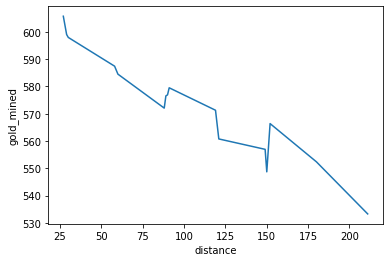

In [96]:
sns.lineplot(data=df_distance_2014, x='distance', y='gold_mined')

In [138]:
df_distance_2015 = df.query('hammer_date == "2015-01-01" and reported_date >"2015-01-01"')\
    .groupby('distance', as_index=False)\
    .agg({'gold_mined':'mean'})
df_distance_2015.head(5)

,distance,gold_mined
0,27,640.602094
1,29,637.784211
2,30,638.083175
3,58,623.726937
4,60,622.505080


<AxesSubplot:xlabel='distance', ylabel='gold_mined'>

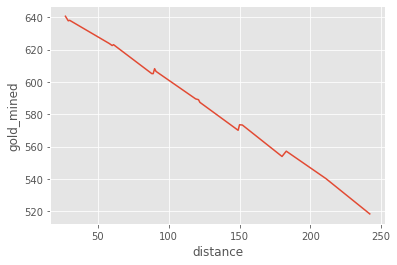

In [134]:
sns.lineplot(data=df_distance_2015, x='distance', y='gold_mined')

In [139]:
df

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date,yar,distance
0,1,2014-01-01,2014-01-31,656,2014-01-01,2014-01-01,30
1,1,2014-01-01,2014-02-28,565,2014-01-01,2014-01-01,58
2,1,2014-01-01,2014-03-31,516,2014-01-01,2014-01-01,89
3,1,2014-01-01,2014-04-30,568,2014-01-01,2014-01-01,119
4,1,2014-01-01,2014-05-31,556,2014-01-01,2014-01-01,150
...,...,...,...,...,...,...,...
13488,2673,2015-08-01,2015-08-31,695,2015-01-01,2015-01-01,30
13489,2674,2015-08-01,2015-08-31,573,2015-01-01,2015-01-01,30
13490,2675,2015-08-01,2015-08-31,617,2015-01-01,2015-01-01,30
13491,2676,2015-08-01,2015-08-31,609,2015-01-01,2015-01-01,30


In [159]:
df_2014_agg = df.query('hammer_date == "2014-01-01" and reported_date < "2014-08-31"')\
    .groupby('dwarf_id', as_index=False)\
    .agg({'gold_mined':'sum', 'distance':'max'})

df_2014_agg['mean_gold_in_day'] = df_2014_agg['gold_mined'] / df_2014_agg['distance']


In [151]:
df_2015_agg = df.query('hammer_date == "2015-01-01" and reported_date > "2015-01-01"')\
    .groupby('dwarf_id', as_index=False)\
    .agg({'gold_mined':'sum', 'distance':'max'})

df_2015_agg['mean_gold_in_day'] = df_2015_agg['gold_mined'] / df_2015_agg['distance']

In [152]:
df_2015_agg

,dwarf_id,gold_mined,distance,mean_gold_in_day
0,532,4714,242,19.479339
1,533,4526,242,18.702479
2,534,4598,242,19.000000
3,535,4704,242,19.438017
4,536,4528,242,18.710744
...,...,...,...,...
2141,2673,695,30,23.166667
2142,2674,573,30,19.100000
2143,2675,617,30,20.566667
2144,2676,609,30,20.300000


In [161]:
df_2014_agg.mean_gold_in_day.mean()

19.43211454421569

In [162]:
df_2015_agg.mean_gold_in_day.mean()

20.482883950543048

c:\users\влдислав\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\влдислав\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_gold_in_day', ylabel='Density'>

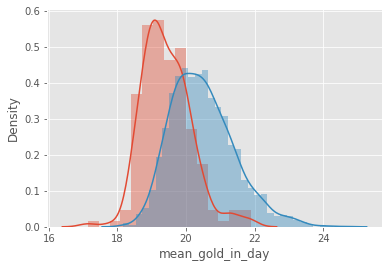

In [160]:
sns.distplot(df_2014_agg.mean_gold_in_day)
sns.distplot(df_2015_agg.mean_gold_in_day)

Сформулируем гипотезы:
    
H0 - между средними двух совокупностей разницы нет.

H1 - между средними двух совокупностей есть разница.

In [156]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    group_control, # числовые значения первой выборки
    group_test, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(group_control), len(group_test)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = group_control.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = group_test.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return { 
            "ci": ci, 
            "p_value": p_value}

  0%|          | 0/2000 [00:00<?, ?it/s]

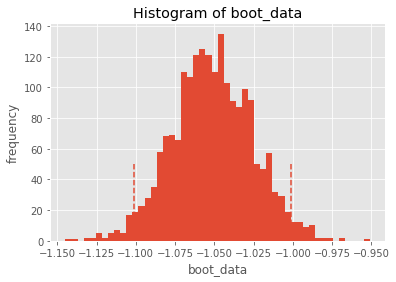

{'ci':               0
 0.025 -1.101283
 0.975 -1.001245,
 'p_value': 0.0}

In [163]:
get_bootstrap(df_2014_agg.mean_gold_in_day, df_2015_agg.mean_gold_in_day , boot_it = 2000)

Отвергаем нулевую гипотезу о равестве средни и принимаем альтернативную гипотезу о том, что в группе Б (2015 года) средний сбор золота в день выше

In [141]:
# Мы можем видеть нисходящую динамику, т.е. чем больше работает гном, тем продуктивнее это делает
# Дополнительно проверим доход на новых гномах - в рамках 30 дней с момента времени жизни

In [164]:
df_2014_agg_distance_30 = df.query('hammer_date == "2014-01-01" and reported_date < "2014-08-31" and distance <= 30')\
    .groupby('dwarf_id', as_index=False)\
    .agg({'gold_mined':'sum', 'distance':'max'})

df_2014_agg_distance_30['mean_gold_in_day'] = df_2014_agg['gold_mined'] / df_2014_agg['distance']


In [165]:
df_2014_agg_distance_30

,dwarf_id,gold_mined,distance,mean_gold_in_day
0,1,656,30,18.663507
1,2,561,30,18.620853
2,3,641,30,18.597156
3,4,567,30,18.924171
4,5,608,30,19.502370
...,...,...,...,...
192,193,612,30,20.400000
193,194,586,30,19.533333
194,195,639,30,21.300000
195,196,599,30,19.966667


In [168]:
df_2015_agg_distance_30 = df.query('hammer_date == "2015-01-01" and reported_date > "2015-01-01" and distance <= 30')\
    .groupby('dwarf_id', as_index=False)\
    .agg({'gold_mined':'sum', 'distance':'max'})

df_2015_agg_distance_30['mean_gold_in_day'] = df_2015_agg['gold_mined'] / df_2015_agg['distance']
df_2015_agg_distance_30

,dwarf_id,gold_mined,distance,mean_gold_in_day
0,532,713,30,19.479339
1,533,632,30,18.702479
2,534,637,30,19.000000
3,535,646,30,19.438017
4,536,692,30,18.710744
...,...,...,...,...
2141,2673,695,30,23.166667
2142,2674,573,30,19.100000
2143,2675,617,30,20.566667
2144,2676,609,30,20.300000


  0%|          | 0/2000 [00:00<?, ?it/s]

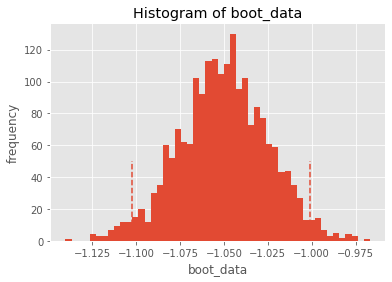

{'ci':               0
 0.025 -1.102422
 0.975 -1.001167,
 'p_value': 0.0}

In [169]:
get_bootstrap(df_2014_agg_distance_30.mean_gold_in_day, df_2015_agg_distance_30.mean_gold_in_day , boot_it = 2000)

 Для новых пользователей, также средний доход на одного пользователя в час выше при новой технологии

1) Необходимо учесть, что золото добывалось в разное время и это не был честный А/Б тест - так не совсем рекомендуется делать.
Например возможно докопали до какой то новой жили или что то изменилось и результат зависит не от изменений технологий. Или например в одном из году была эпедемия и гномы могли чувствовать себя хуже на фоне болезни

2) Честный а/б тест - мы бы на одном руднике и не смогли бы провести т.к. есть риск сетевого эффекта и могла измениться мотивация для работы одной из групп - и когортный анализ здесь меньшее зло.
В целом считаем допустимым

По итогу - оставляем новую версию оборудования. Ген директор ошибался. 